### **Milestone 2**

### Import required libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

### Load the dataset

In [2]:
from google.colab import files

uploaded = files.upload()
df = pd.read_csv('cleaned_ITSM_data.csv')
df.head()

Saving cleaned_ITSM_data.csv to cleaned_ITSM_data.csv


,Status,Ticket ID,Priority,Source,Topic,Agent Group,Agent Name,Created time,First response time,Resolution time,...,Agent interactions,Survey results,Product group,Support Level,Country,Latitude,Longitude,Priority_Score,Resolution_Duration,First_Response_Duration
0,Closed,TCKT-100000,High,Email,General Inquiry,Security,Khalid Al-Salem,2024-07-04 12:42:00,2024-07-04 13:02:00,2024-07-04 14:30:00,...,5,Neutral,Cloud,L3,Oman,25.1856,50.9447,3,1.80,20.0
1,Closed,TCKT-100001,High,Chat,Network Issue,Customer Service,Ahmed Al-Sabah,2024-05-23 20:03:00,2024-05-23 20:25:00,2024-05-23 22:00:00,...,4,Dissatisfied,Cloud,L2,Qatar,23.2741,55.3867,3,1.95,22.0
2,In Progress,TCKT-100002,Low,Phone,General Inquiry,Development,Mohammed Al-Mansoori,2024-04-13 20:51:00,2024-04-13 21:41:00,2024-04-14 00:47:00,...,3,Dissatisfied,Software,L1,Bahrain,23.6264,50.1302,1,3.93,50.0
3,Resolved,TCKT-100003,Critical,Chat,Access Request,Development,Mohammed Al-Khalifa,2024-05-13 12:50:00,2024-05-13 12:50:00,2024-05-13 13:48:00,...,5,Dissatisfied,Network,L2,Kuwait,25.0736,54.8437,4,0.97,0.0
4,Closed,TCKT-100004,Critical,Portal,Hardware Failure,Customer Service,Hassan Al-Nasser,2024-06-19 22:51:00,2024-06-19 23:00:00,2024-06-19 23:49:00,...,4,Neutral,Hardware,L3,Qatar,24.7362,51.4839,4,0.97,9.0


## **Data Visualization**

1. Tickets distribution by its types

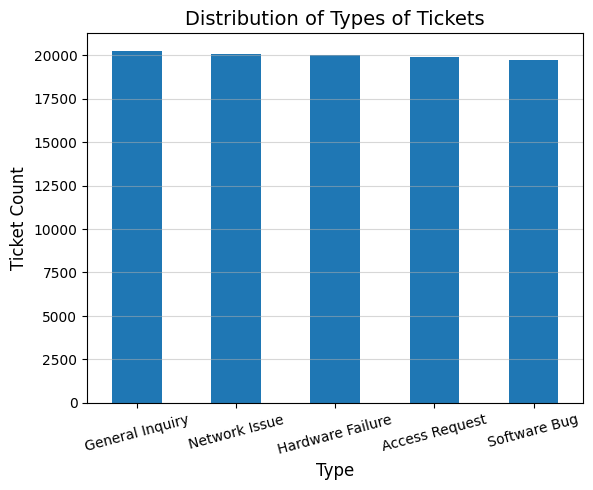

In [3]:
topic_counts = df["Topic"].value_counts()

topic_counts.plot(kind="bar")

plt.title("Distribution of Types of Tickets", fontsize=14)
plt.xlabel("Type", fontsize=12)
plt.ylabel("Ticket Count", fontsize=12)
plt.xticks(rotation=15)
plt.grid(axis="y",alpha=0.5)
plt.show()

2. Tickets Distribution based on its Category group  

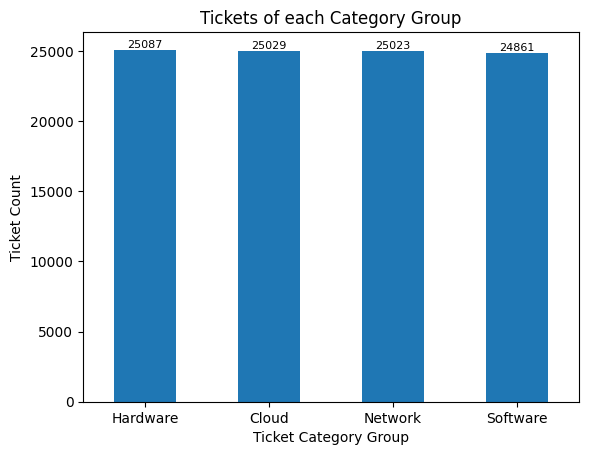

In [41]:
category = df["Product group"].value_counts()
category.plot(kind="bar")

#adding value labels
for x, y in enumerate(category):
    plt.text(x, y, y, ha="center", va="bottom", fontsize=8)

plt.title("Tickets of each Category Group")
plt.xlabel("Ticket Category Group")
plt.ylabel("Ticket Count")
plt.xticks(rotation=0)

plt.show()

3. Tickets distribution based on its priority

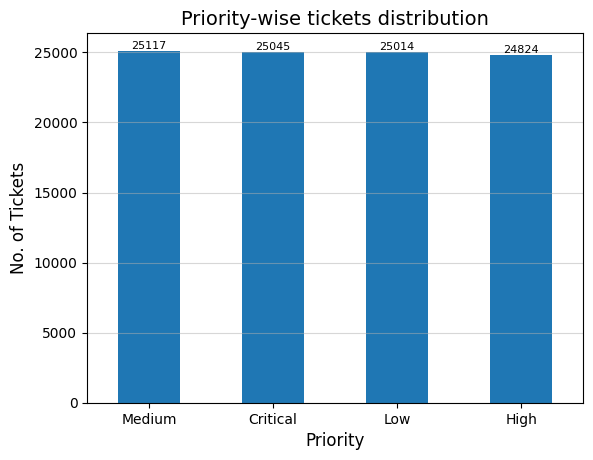

In [6]:
priority_counts = df["Priority"].value_counts()

priority_counts.plot(kind="bar")

for i, v in enumerate(priority_counts):
    plt.text(i, v, v, ha="center", va="bottom", fontsize=8)

plt.title("Priority-wise tickets distribution", fontsize=14)
plt.xlabel("Priority", fontsize=12)
plt.ylabel("No. of Tickets", fontsize=12)
plt.grid(axis="y", alpha=0.5)
plt.xticks(rotation=0)
plt.show()

4. Average Resolution Time of each Priority tickets

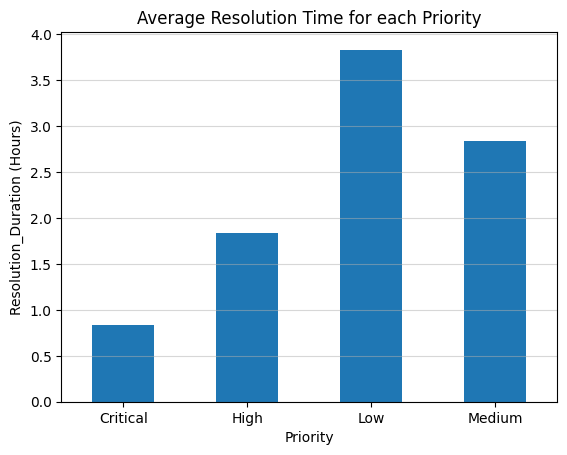

In [7]:
avg_priority_resolution = df.groupby("Priority")["Resolution_Duration"].mean()

avg_priority_resolution.plot(kind="bar")

plt.title("Average Resolution Time for each Priority")
plt.xlabel("Priority")
plt.ylabel("Resolution_Duration (Hours)")
plt.xticks(rotation=0)
plt.grid(axis="y", alpha=0.5)

plt.show()

5. Resolved tickets out of Total tickets for each Agent Group

Firstly prepare the data

In [8]:
# Total tickets per agent group
total_tickets = df.groupby("Agent Group")["Ticket ID"].count()

# Resolved tickets per agent group
resolved_tickets = (
    df[df["Status"] == "Resolved"]
    .groupby("Agent Group")["Ticket ID"]
    .count()
)

# Create summary DataFrame
status_summary = pd.DataFrame({
    "Resolved": resolved_tickets,
    "Total": total_tickets
}).fillna(0)

status_summary["Yet to resolve"] = (status_summary["Total"] - status_summary["Resolved"])

# Convert to long format for seaborn
status_long = status_summary[["Resolved", "Yet to resolve"]].reset_index()
status_long = status_long.melt(
    id_vars="Agent Group",
    var_name="Ticket Status",
    value_name="Ticket Count"
)


Plot a stacked bar chart using seaborn

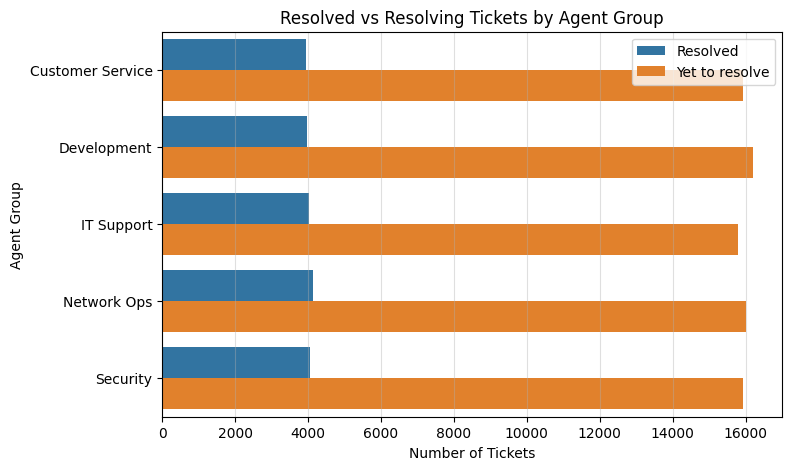

In [9]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=status_long,
    x="Ticket Count",
    y="Agent Group",
    hue="Ticket Status",
    orient="h"
)

plt.title("Resolved vs Resolving Tickets by Agent Group", fontsize=12)
plt.xlabel("Number of Tickets")
plt.ylabel("Agent Group")
plt.grid(axis="x", alpha=0.4)
plt.legend()

plt.show()

Percentage summary enabling the comparison of their resolution performances

In [10]:
status_summary["Resolved_Percentage"] = (status_summary["Resolved"] / status_summary["Total"] * 100).round(2)
print(status_summary)

                  Resolved  Total  Yet to resolve  Resolved_Percentage
Agent Group                                                           
Customer Service      3954  19884           15930                19.89
Development           3962  20158           16196                19.65
IT Support            4030  19829           15799                20.32
Network Ops           4142  20144           16002                20.56
Security              4046  19985           15939                20.25


6. Customer Satisfaction Distribution

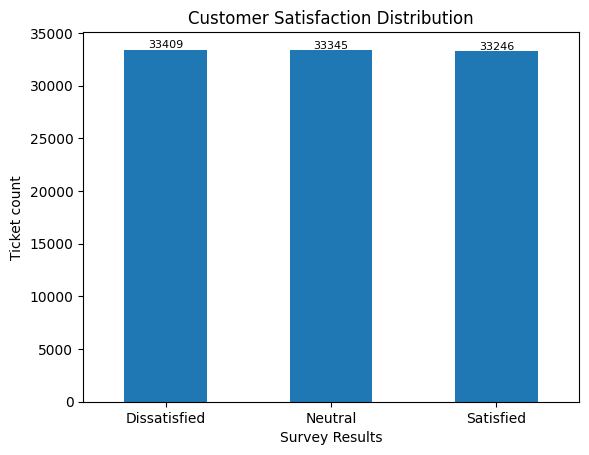

In [12]:
survey_counts = df["Survey results"].value_counts()
survey_counts.plot(kind="bar")

for x, y in enumerate(survey_counts):
    plt.text(x, y, y, ha="center", va="bottom", fontsize=8)

plt.title("Customer Satisfaction Distribution")
plt.ylabel("Ticket count")
plt.xlabel("Survey Results")
plt.xticks(rotation=0)
plt.show()

7. Tickets Distribution by their Source

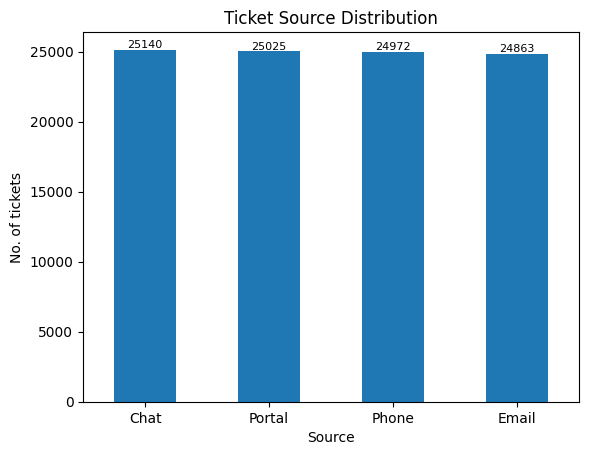

In [14]:
source_count = df["Source"].value_counts()
source_count.plot(kind="bar")

for x, y in enumerate(source_count):
    plt.text(x, y, y, ha="center", va="bottom", fontsize=8)

plt.title("Ticket Source Distribution")
plt.ylabel("No. of tickets")
plt.xlabel("Source")
plt.xticks(rotation=0)
plt.show()

### **Cluster and Similarity Analysis**

In [15]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

Encoding the 'Product group' categorical data

In [16]:
le = LabelEncoder()

#Handle Missing Values + Encode Categories
df['Category_Encoded'] = le.fit_transform(df['Product group'].fillna('Unknown'))

Select the features for Clustering

In [17]:
X = df[['Priority_Score', 'Resolution_Duration', 'Category_Encoded']]

#Remove Missing Values
X = X.dropna()

#Standardize the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Creating 6 clusters using KMeans method

In [32]:
#Apply KMeans Clustering
kmeans = KMeans(n_clusters=6, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

#Assign Cluster Labels Back to Original Data
df.loc[X.index, 'Cluster_ID'] = cluster_labels

Assigning each ticket a Similarity_Score indicating how closely it matches the typical behaviour of its assigned cluster:

In [33]:
distances = np.linalg.norm(
    X_scaled - kmeans.cluster_centers_[cluster_labels],
    axis=1
)

df.loc[X.index, 'Similarity_Score'] = 1 / (1 + distances)

Verifying the features

In [34]:
df.head()

,Status,Ticket ID,Priority,Source,Topic,Agent Group,Agent Name,Created time,First response time,Resolution time,...,Support Level,Country,Latitude,Longitude,Priority_Score,Resolution_Duration,First_Response_Duration,Category_Encoded,Cluster_ID,Similarity_Score
0,Closed,TCKT-100000,High,Email,General Inquiry,Security,Khalid Al-Salem,2024-07-04 12:42:00,2024-07-04 13:02:00,2024-07-04 14:30:00,...,L3,Oman,25.1856,50.9447,3,1.80,20.0,0,1.0,0.688161
1,Closed,TCKT-100001,High,Chat,Network Issue,Customer Service,Ahmed Al-Sabah,2024-05-23 20:03:00,2024-05-23 20:25:00,2024-05-23 22:00:00,...,L2,Qatar,23.2741,55.3867,3,1.95,22.0,0,1.0,0.683034
2,In Progress,TCKT-100002,Low,Phone,General Inquiry,Development,Mohammed Al-Mansoori,2024-04-13 20:51:00,2024-04-13 21:41:00,2024-04-14 00:47:00,...,L1,Bahrain,23.6264,50.1302,1,3.93,50.0,3,0.0,0.588455
3,Resolved,TCKT-100003,Critical,Chat,Access Request,Development,Mohammed Al-Khalifa,2024-05-13 12:50:00,2024-05-13 12:50:00,2024-05-13 13:48:00,...,L2,Kuwait,25.0736,54.8437,4,0.97,0.0,2,3.0,0.585260
4,Closed,TCKT-100004,Critical,Portal,Hardware Failure,Customer Service,Hassan Al-Nasser,2024-06-19 22:51:00,2024-06-19 23:00:00,2024-06-19 23:49:00,...,L3,Qatar,24.7362,51.4839,4,0.97,9.0,1,5.0,0.685498


### Cluster Insights:

1. Average Similarity Score of each Cluster

This shows how internally consistent each cluster is.

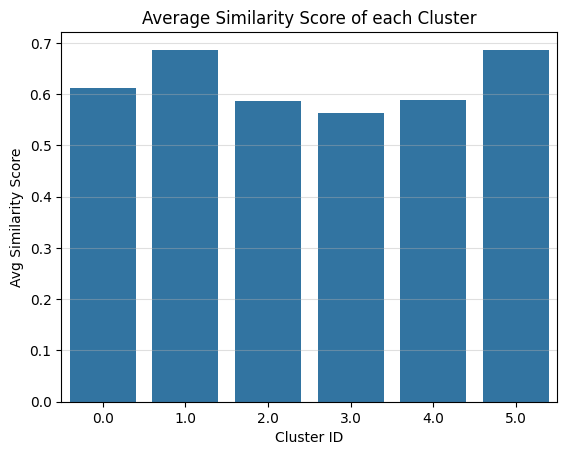

In [35]:
cluster_similarity = df.groupby('Cluster_ID')['Similarity_Score'].mean()

sns.barplot(x=cluster_similarity.index, y=cluster_similarity.values)
plt.title("Average Similarity Score of each Cluster")
plt.xlabel("Cluster ID")
plt.ylabel("Avg Similarity Score")
plt.grid(axis="y", alpha=0.4)
plt.show()

2. Resolution Time of each Cluster

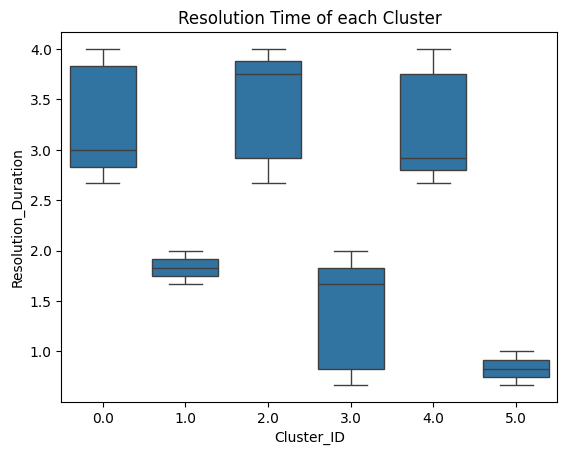

In [36]:
sns.boxplot(x='Cluster_ID', y='Resolution_Duration', data=df)
plt.title("Resolution Time of each Cluster")
plt.show()

Insights:
- Lower median means faster resolutions this '5.0' cluster is most well-defined
- Narrow box → consistent resolution times
- Wide box → unpredictable resolution times

3. Comparing Cluster size with the Ticket Issue Type

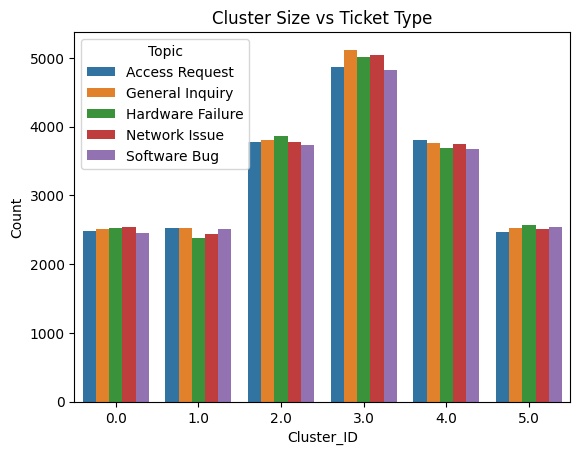

In [39]:
cluster_size = df.groupby(['Cluster_ID', 'Topic']).size().reset_index(name='Count')

sns.barplot(data=cluster_size, x='Cluster_ID', y='Count', hue='Topic')
plt.title("Cluster Size vs Ticket Type")
plt.show()

In [40]:
df.to_csv("ticket_clusters.csv", index=False)